In [1]:
import numpy as np
import pandas as pd
import math 
import regex as re
from datetime import datetime
import timedelta as td
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def dirImagens(pDirImagem):
    try:
        if (not os.path.isdir(pDirImagem)):
            os.mkdir(pDirImagem)
    except OSError as e:
        print(e.args[1])
    
def abriPlanilha():
    diretorio='./data/'
    for arquivo in os.listdir(diretorio):
        if (re.findall('csv', arquivo)):
            return (diretorio+arquivo)
    
dirImagens('Imagens')
    
ins = pd.read_csv(abriPlanilha()
                 ,header=1
                 ,sep=','
                 ,low_memory=True
                 )

In [3]:
colunas=['col1','col2','col3','situacao','nroInscricao','nome',
        'cpf','dataNascimento','genero','escolaridade',
        'instituicao','telefone','email','cep','bairro',
        'cidade','incluiOutro','perfil','observacao','selecionado','perfis']

ins.columns=colunas

In [4]:
def columnsDrop():
    ins.drop('situacao', axis=1, inplace=True)
    ins.dropna(axis=1, how='all', inplace=True)
    ins.dropna(axis=0, how='all', inplace=True)

columnsDrop()

In [5]:
def columnsInsert():
    ins.insert(3, 'cpfAjustado', '')
    ins.insert(4, 'cpfValidado', '')
    ins.insert(5, 'cpfUF', '')
    ins.insert(7, 'idade', 0)
    ins.insert(8, 'dataNascAjustada', ' ')
    ins.insert(10, 'generoId', 99)
    ins.insert(12, 'escolaridadeId', 0)
    ins.insert(13, 'escolaridade2', ' ')
    ins.insert(15, 'instituicaoId', 0)
    ins.insert(16, 'instituicaoAjustada', '')
    ins.insert(18, 'telefoneAjustado', '')
    ins.insert(20, 'emailValidado', '')
    ins.insert(22, 'cepAjustado', '')
    ins.insert(25, 'cidadeId', 0)
    ins.insert(29, 'tamanhoCamisetaId', 0)
    ins.insert(31, 'selecionado2', '')

columnsInsert()

In [6]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   nroInscricao         136 non-null    object
 1   nome                 136 non-null    object
 2   cpf                  57 non-null     object
 3   cpfAjustado          136 non-null    object
 4   cpfValidado          136 non-null    object
 5   cpfUF                136 non-null    object
 6   dataNascimento       136 non-null    object
 7   idade                136 non-null    int64 
 8   dataNascAjustada     136 non-null    object
 9   genero               136 non-null    object
 10  generoId             136 non-null    int64 
 11  escolaridade         136 non-null    object
 12  escolaridadeId       136 non-null    int64 
 13  escolaridade2        136 non-null    object
 14  instituicao          120 non-null    object
 15  instituicaoId        136 non-null    int64 
 16  institui

### Eliminar linhas onde o "nome" é "NaN" ou "Nulo".

In [7]:
def eliminarLinhasNomeNulo(dataFrame, campo):
    linhas=dataFrame[pd.isnull(dataFrame[campo])].index
    if (not len(linhas)==0):
        print(linhas)
        dataFrame.drop(axis=0, labels=linhas, inplace=True)
    
    return dataFrame
    
ins=eliminarLinhasNomeNulo(ins, 'nome')

### Tabela (output).

In [8]:
#ins.head()
#ins

### Biblioteca de funções.

In [9]:
def cpfAjustado(cpf) -> str:
    if (pd.isnull(cpf)):
        return "Não informado!"
    
    pattern='([0-9]{3})([.])([0-9]{3})([.])([0-9]{3})([-])([0-9]{2})'
    if (re.search(pattern, cpf)):
        return cpf
    
    cpf=re.sub('[\.\-]','',cpf); cpf=cpf.zfill(11)
        
    pattern='([0-9]{3})([0-9]{3})([0-9]{3})([0-9]{2})'
    cpf=re.search(pattern, cpf)
    cpf='{}.{}.{}-{}'.format(cpf.group(1)
                            ,cpf.group(2)
                            ,cpf.group(3)
                            ,cpf.group(4)
                            )
    return cpf

def dataNascAjustada(pDataNascimento : str, éIdade : bool = False):
    if (pd.isnull(pDataNascimento)):
        if (éIdade):
            return 0
        else:
            return "Não informada!"
    
    dtNasc=pDataNascimento; dtRef=''
    #   
    pattern='([0-9]{1,2})([/])([0-9]{1,2})([/])([0-9]{2,4})'
        
    if (not re.search(pattern, dtNasc)):
        if (len(dtNasc)==6 or len(dtNasc)==8):
            pattern='([0-9]{2})([0-9]{2})([0-9]{2,4})'
            dtNasc=re.search(pattern, dtNasc)
            if (dtNasc):
                dtNasc='{}/{}/{}'.format(dtNasc.group(1),
                                        dtNasc.group(2),
                                        dtNasc.group(3)
                                        )
            else:
                return 0
            
        else:
            return 0
        
    dtNasc=datetime.strptime(dtNasc, '%d/%m/%Y')
                
    if (éIdade):
        diferencaData=(datetime.today()-dtNasc)
        dias=diferencaData.days
        anos, dias = divmod(dias, 365)
        dtRef=anos
    else:
        dtRef=dtNasc.strftime('%d/%m/%Y %H:%M:%S')
    
    return dtRef

def quantGenero(genero) -> int:
    if (pd.isnull(genero)):
        return 0
    else:
        genero=genero.upper(); genero=str.strip(genero)
    if (genero=='FEMININO'):
        return 1
    elif (genero=='MASCULINO'):
        return 2
    elif (re.search('N[AÃ]O BIN[AÁ]RIO', genero)):
        return 3
    elif (re.search('PREFIRO N[AÃ]O INFORMAR', genero)):
        return 4
    else:
        return 99
    
def quantEscolaridade(escolaridade) -> int:
    escolaridade=escolaridade.upper(); escolaridade=str.strip(escolaridade)
    valor=0
    if (
        re.findall('M[EÉ]DIO', escolaridade) or
        (re.findall('EM', escolaridade) and 
             not (re.findall('SUPERIOR', escolaridade) or
                  re.findall('GRADUA[CÇ][ÃA]O',escolaridade))
        )
       ):
        valor=10
    elif (
         re.findall('SUPERIOR', escolaridade) or
         re.findall('FACULDADE', escolaridade) or
         re.findall('BACHAREL', escolaridade) or
         re.findall('GRADUA[CÇ][AÃ]O', escolaridade) or
         re.findall('GRADUAD[AO]', escolaridade)
         ):
        valor=20
    elif re.findall('P[ÓO]S', escolaridade):
        valor=30
    elif re.findall('MESTRADO', escolaridade):
        valor=40
    elif re.findall('DOUTORADO', escolaridade):
        valor=50
    else:
        return valor
          
    if (not (re.findall('INCOMPLETO', escolaridade) or 
        re.findall('CURSANDO', escolaridade) or
        re.findall('ANDAMENTO', escolaridade))):
        valor+=5
        
    return valor

def qualEscolaridade(escolaridade) -> str:
    escolaridade=escolaridade.upper(); escolaridade=str.strip(escolaridade)
    texto='N/D'
    if (
        re.findall('M[EÉ]DIO', escolaridade) #or
        #re.findall('EM', escolaridade)
       ):
        texto='ENS.MÉDIO'
    elif (
         re.findall('SUPERIOR', escolaridade) or
         re.findall('FACULDADE', escolaridade) or
         re.findall('BACHAREL', escolaridade) or
         re.findall('GRADUAD[AO]', escolaridade)
         ):
        texto='ENS.SUPERIOR'
    elif re.findall('P[ÓO]S', escolaridade):
        texto='PÓS-GRADUAÇÃO'
    elif re.findall('MESTRADO', escolaridade):
        texto='MESTRADO'
    elif re.findall('DOUTORADO', escolaridade):
        texto='DOUTORADO'
    else:
        return texto
          
    if (not (re.findall('INCOMPLETO', escolaridade) or 
        re.findall('CURSANDO', escolaridade) or
        re.findall('ANDAMENTO', escolaridade))):
        texto=texto+' COMPLETO'
    else:
        texto=texto+' INCOMPLETO/CURSANDO'
        
    return texto

def telefoneAjustado(fone) -> str:
    #print('Telefone: {}'.format(fone))
    if (pd.isnull(fone)):
        #print('Não informado!'); print('----------------')
        return 'Não informado!'
    else:
        fone=str.strip(fone)
    
    pattern='([\(])([0-9]{2})([\)])([\ ])([0-9]{5})([-])([0-9]{4})'
    if (re.search(pattern, fone)):
        #print('foneCond.1: '+fone); print('----------------')
        return fone

    for char in ([' ','-','\(','\)']):
        fone=re.sub(char,'',fone)
    
    pattern='([0-9]{2})([0-9]{5})([0-9]{4})'
    if (re.search(pattern, fone) and (not re.search('^55', fone))): 
        fone=re.search(pattern, fone)
        fone='({}) {}-{}'.format(fone.group(1)
                                 ,fone.group(2)
                                 ,fone.group(3)
                                )
        #print('foneCond.2: '+fone); print('----------------')
    elif (re.search('^55',fone)):
        pattern = '([0-9]{2})([0-9]{2})([0-9]{5})([0-9]{4})'
        fone=re.search(pattern, fone)
        fone='({}) {}-{}'.format(
                                fone.group(2)
                                ,fone.group(3)
                                ,fone.group(4)
                                )
        #print('foneCond.3: '+fone); print('----------------')
    else:
        #print('Inválido'); print('----------------')
        fone='Inválido'

    return fone

def validarEmail(email):
    # https://www.geeksforgeeks.org/check-if-email-address-valid-or-not-in-python/
    email=str.strip(email)
    pattern='(^[a-zA-Z0-9_.-]{4,40})(@){1}([a-zA-Z0-9-]+)(\.){1}([a-zA-Z0-9-.]+$)'
    #print(pattern, email)
    email=re.search(pattern, email)
    #print(email)
    if (not email):
        return [False, 'Formação do E-Mail incorreta!']
    #print(email.group(2), email.start(), email.end()) ## @
    return [True, str.lower(email.group(0))]


def instituicaoAjustada(pInst) -> list:
    if (pd.isnull(pInst)):
        return ['Não Informada!',0]
    else:
        pInst=pInst.upper(); pInst=str.strip(pInst)

    if (re.findall('ENIAC',pInst)):
        inst=['ENIAC',1]
    elif (re.findall('INSTITUTO FEDERAL',pInst) or 
          re.findall('IF',pInst)
         ):
        inst=['IFSP',2]
    elif (re.findall('USP',pInst) or 
         re.findall('UNIVERSIDADE DE S[AÃ]O PAULO',pInst)):
        inst=['USP',3]
    elif (re.findall('BELAS ARTES', pInst)):
        inst=['BELAS ARTES',4]
    elif (re.findall('FATEC', pInst) or re.findall('FACULDADE DE TECNOLOGIA DE GUARULHOS', pInst)):
        inst=['FATEC',5]
    elif (re.findall('WYDEN', pInst)):
        inst=['WYDEN',6]
    elif (re.findall('JUDAS', pInst)):
        inst=['UNIV.SÃO JUDAS',7]
    elif (re.findall('FIAP', pInst)):
        inst=['FIAP',8]
    elif (re.findall('UNICAMP', pInst) or
         re.findall('CAMPINAS', pInst)):
        inst=['UNICAMP',9]
    elif (re.findall('ETEC', pInst)):
        inst=['ETEC',10]
    elif (re.findall('LICEU', pInst)):
        inst=['LICEU',11]
    elif (re.findall('MOACYR CAMPOS', pInst)):
        inst=['MOACYR CAMPOS',12]
    elif (re.findall('UNINOVE', pInst)):
        inst=['UNINOVE',13]
    elif (re.findall('FAM', pInst)):
        inst=['FAM',14]
    elif (re.findall('DRUMMOND', pInst)):
        inst=['DRUMMOND',15]
    elif (re.findall('IMPACTA', pInst)):
        inst=['IMPACTA',16]
    elif (re.findall('TORRICELLI', pInst)):
        inst=['TORRICELLI',17]
    elif (re.findall('ITB', pInst)):
        inst=['ITB',18]
    elif (re.findall('UNESP', pInst)):
        inst=['UNESP',19]
    elif (re.findall('CRUZEIRO DO SUL', pInst)):
        inst=['CRUZEIRO DO SUL',20]
    elif (re.findall('ANHANGUERA', pInst)):
        inst=['ANHANGUERA',21]
    elif (re.findall('VIRTUAL', pInst)):
        inst=['UNIVESP',22]
    elif (re.findall('SAL[EÉ]M', pInst)):
        inst=['JOÃO C.SALÉM',23]
    elif (re.findall('BROTERO', pInst)):
        inst=['FREDERICO B.BROTERO',24]
    elif (re.findall('SENAC', pInst)):
        inst=['SENAC',25]
    elif (re.findall('UNISA', pInst)):
        inst=['UNISA',26]
    elif (re.findall('UNG', pInst) or re.findall('UNIVERSIDADE DE GUARULHOS', pInst)):
        inst=['UNG',27]
        
    else:
        inst=['Outros',99]
    
    return inst

def cepAjustado(cep) -> str:
    cep=str.strip(cep)
    pattern='([0-9]{5})([-]{1})([0-9]{3})'
    if (not re.search(pattern, cep)):
        cep=re.sub('-','', cep)
        cep=cep.zfill(8)
        pattern='([0-9]{5})([0-9]{3})'
        cep=re.search(pattern, cep)
        cep='{}-{}'.format(cep.group(1),cep.group(2))
    return cep

def cidadeMaiuscula(cidade) -> str:
    return str.upper(str.strip(cidade))

def quantCidade(cidade) -> int:
    cidade=cidade.upper(); cidade=str.strip(cidade)
    if re.findall('GUARULHOS', cidade):
        return 1
    elif re.findall('S[ÃA]O PAULO', cidade):
        return 2
    elif re.findall('RIBEIR[ÃA]O PRETO', cidade):
        return 3
    elif re.findall('SANTO ANDR[ÉE]', cidade):
        return 4
    elif re.findall('GUARUJ[ÁA]', cidade):
        return 5
    elif re.findall('IGARAT[ÁA]', cidade):
        return 6
    elif re.findall('CARAPICU[ÍI]BA', cidade):
        return 7
    elif re.findall('S[ÃA]O VICENTE', cidade):
        return 8
    elif re.findall('ITAPEVI', cidade):
        return 9
    else:
        return 99

def quantTamanhoCamiseta(pTamanho) -> int:
    t=re.split('\s',pTamanho)
    if (t[len(t)-1]=='P'):
        return 1
    elif (t[len(t)-1]=='M'):
        return 2
    elif (t[len(t)-1]=='G'):
        return 3
    elif (t[len(t)-1]=='GG'):
        return 4
    else:
        return 99    

def opcaoSimNao(opcao):
    if (pd.isnull(opcao)):
        opcao='NÃO'
    if (re.findall('S[IM]', opcao.upper())):
        opcao='SIM'
    else:
        opcao='NÃO'
    return opcao

### Atribuição de dados e ajustes (ETL).

In [10]:
ins['cpfAjustado']=ins['cpf'].apply(lambda cpf: cpfAjustado(cpf))
ins['idade']=ins['dataNascimento'].apply(lambda dtNasc: dataNascAjustada(dtNasc, True))
ins['dataNascAjustada']=ins['dataNascimento'].apply(lambda dtNasc: dataNascAjustada(dtNasc, False))
ins['generoId']=ins['genero'].apply(lambda genero: quantGenero(genero))
ins['escolaridadeId']=ins['escolaridade'].apply(lambda escolaridade: quantEscolaridade(escolaridade))
ins['escolaridade2']=ins['escolaridade'].apply(lambda escolaridade: qualEscolaridade(escolaridade))
ins['instituicaoId']=ins['instituicao'].apply(lambda instituicao: instituicaoAjustada(instituicao)[1])
ins['instituicaoAjustada']=ins['instituicao'].apply(lambda instituicao: instituicaoAjustada(instituicao)[0])
ins['telefoneAjustado']=ins['telefone'].apply(lambda fone: telefoneAjustado(fone))
ins['emailValidado']=ins['email'].apply(lambda email : validarEmail(email)[1])
ins['cepAjustado']=ins['cep'].apply(lambda cep : cepAjustado(cep))
ins['cidade']=ins['cidade'].apply(lambda cidade : cidadeMaiuscula(cidade))
ins['cidadeId']=ins['cidade'].apply(lambda cidade: quantCidade(cidade))
ins['tamanhoCamisetaId']=ins['observacao'].apply(lambda obs: quantTamanhoCamiseta(obs))
ins['selecionado2']=ins['selecionado'].apply(lambda selecionado : opcaoSimNao(selecionado))

### Classe de validação de documentos (CPF e CNPJ).

In [11]:
class validaDocs:
    def __init__(self):
        self.__uf=[
                    ['DF','GO','MS','MT','TO'],
                    ['AC','AM','AP','PA','RO','RR'],
                    ['CE','MA','PI'],
                    ['AL','PB','PE','RN'],
                    ['BA','SE'],
                    ['MG'],
                    ['ES','RJ'],
                    ['SP'],
                    ['PR','SC'],
                    ['RS']
                  ]
        self.uf = None
        self.__dg1 = 0
        self.__dg2 = 0
    
    def CPF(self, cpf) -> list:
        if (pd.isnull(cpf)):
            return ('CPF não informado!', False, None)
        else:
            cpf=re.sub('[\.\-]','',cpf); cpf=cpf.zfill(11)

        pattern='[0-9]{3}[0-9]{3}[0-9]{3}[0-9]{2}'
        #pattern='[0-9]{3}\.[0-9]{3}\.[0-9]{3}\-[0-9]{2}'
        if (not re.search(pattern, cpf)):
            return ('Formato inválido!', False, None)
        
        # Primeiro dígito...
        soma=0
        for p, value in enumerate(range(10,1,-1)):
            #print(cpf[p], p, value)
            soma+=(int(cpf[p])*value)
        
        self.__dg1=(11-(soma%11))
        if (self.__dg1>=10):
            self.__dg1=0
            
        # Segundo dígito...
        soma=0
        for p, value in enumerate(range(11,1,-1)):
            #print(cpf[p], p, value)
            soma+=(int(cpf[p])*value)
        
        self.__dg2=(11-(soma%11))
        if (self.__dg2>=10):
            self.__dg2=0
       
        ## Dígito 1 e 2...
        #print('Dígito 1: {}, dígito 2: {}'.format(self.__dg1, self.__dg2))
        if (
            (self.__dg1!=int(cpf[9])) or
            (self.__dg2!=int(cpf[10]))
           ):
            return ('Dígito(s) inválido(s)!', False, None)
        else:
            rCPF=cpf[0:3]+'.'+cpf[3:6]+'.'+cpf[6:9]+'-'+cpf[9:]
        
        ## Atribui a lista de UFs.
        self.uf = self.__uf[int(cpf[8])-1]
        
        return (rCPF, True, self.uf)
    
    def CNPJ(self, cnpj) -> list:
        if (pd.isnull(cnpj)):
            return ('CNPJ não informado!', False, None)
        else:
            cnpj=re.sub('[\.\-\/\\\]','',cnpj);  cnpj.zfill(14)
        
        pattern='[0-9]{2}[0-9]{3}[0-9]{3}[0-9]{4}[0-9]{2}'
        if (not re.search(pattern, cnpj) or (len(cnpj)!=14)):
            return ('Formato inválido!', False, None)
        
        # Primeiro dígito...
        soma=0
        for p, valor in enumerate(range(5,1,-1)):
            #print(p, valor, cnpj[p])
            soma+=(int(cnpj[p])*valor)
        
        for p, valor in enumerate(range(9,1,-1)):
            #print(p, valor, cnpj[p+4])
            soma+=(int(cnpj[p+4])*valor)

        resto=((soma%11))
        if (resto<=1):
            self.__dg1=0
        else:
            self.__dg1=(11-resto)
        
        # Segundo dígito...
        soma=0
        for p, valor in enumerate(range(6,1,-1)):
            #print(p, valor, cnpj[p])
            soma+=(int(cnpj[p])*valor)
        
        for p, valor in enumerate(range(9,1,-1)):
            #print(p, valor, cnpj[p+5])
            soma+=(int(cnpj[p+5])*valor)

        resto=((soma%11))
        if (resto<=1):
            self.__dg2=0
        else:
            self.__dg2=(11-resto)
        
        #print(self.__dg1, self.__dg2)
        if (
            (self.__dg1!=int(cnpj[12])) or
            (self.__dg2!=int(cnpj[13]))
            ):
            return ('Dígito(s) verificador(es) inválido(s)', False, None)
        else:
            rCNPJ=cnpj[0:2]+'.'+cnpj[2:5]+'.'+cnpj[5:8]+'/'+cnpj[8:12]+'-'+cnpj[12:]

        return (rCNPJ, True, None)


In [12]:
validarCPF=validaDocs()
ins['cpfValidado']=ins['cpf'].apply(lambda cpf : validarCPF.CPF(cpf)[0])
ins['cpfUF']=ins['cpf'].apply(lambda cpf : validarCPF.CPF(cpf)[2])

### Apenas os selecionados!

In [13]:
ins=ins[(ins['selecionado2']=='SIM')]

### Tabela com estilo e cores.

In [14]:
#https://pandas.pydata.org/docs/user_guide/style.html
def make_pretty(styler):
    styler.background_gradient(axis=None, vmin=15, vmax=70, cmap="OrRd", subset=['idade'])
    #styler.background_gradient(axis=None, vmin=1, vmax=10, cmap='Dark2', subset=['generoId'])
    styler.background_gradient(axis=None, vmin=10, vmax=55, cmap='Pastel1', subset=['escolaridadeId'])
    return styler

In [15]:
ins.style.pipe(make_pretty) 
#ins[['nome','cpf','dataNascimento','idade','telefone','telefoneAjustado']]

,nroInscricao,nome,cpf,cpfAjustado,cpfValidado,cpfUF,dataNascimento,idade,dataNascAjustada,genero,generoId,escolaridade,escolaridadeId,escolaridade2,instituicao,instituicaoId,instituicaoAjustada,telefone,telefoneAjustado,email,emailValidado,cep,cepAjustado,bairro,cidade,cidadeId,incluiOutro,perfil,observacao,tamanhoCamisetaId,selecionado,selecionado2
0,1,Isabelle Victoria Pereira De Souza,51454217880,514.542.178-80,514.542.178-80,['SP'],12/09/2003,20,12/09/2003 00:00:00,Feminino,1,Ensino Superior,25,ENS.SUPERIOR COMPLETO,Belas Artes,4,BELAS ARTES,11954852961,(11) 95485-2961,isabellevictoria.urs@gmail.com,isabellevictoria.urs@gmail.com,08121-620,08121-620,Jd Nélia,SÃO PAULO,2,N,Desenvolvedor,Tamanho de Camiseta: M,2,SIM,SIM
5,6,Richard Klaoss Neumann,54807928813,548.079.288-13,548.079.288-13,['SP'],30/07/2005,18,30/07/2005 00:00:00,Masculino,2,Ensino médio e técnico completo,15,ENS.MÉDIO COMPLETO,"No momento, nenhuma",99,Outros,11997103862,(11) 99710-3862,richardklaossneumann@gmail.com,richardklaossneumann@gmail.com,7230450,07230-450,Parque Uirapuru,GUARULHOS,1,nan,Estudante de programação e concurso,Tamanho de Camiseta: G,3,SIM,SIM
6,7,Cristofer Batista da Silva,48859050871,488.590.508-71,488.590.508-71,['SP'],14/02/2005,19,14/02/2005 00:00:00,Masculino,2,Ensino Médio Completo,15,ENS.MÉDIO COMPLETO,nan,0,Não Informada!,16996194782,(16) 99619-4782,cristofersilva.rp@gmail.com,cristofersilva.rp@gmail.com,14050220,14050-220,Vila Amélia,RIBEIRÃO PRETO,3,N,Empreendedor e Designer de UX,Tamanho de Camiseta: G,3,SIM,SIM
7,8,Thiago Henrique Silva,38298390814,382.983.908-14,382.983.908-14,['SP'],22/06/2002,21,22/06/2002 00:00:00,Masculino,2,Ensino Superior Incompleto,20,ENS.SUPERIOR INCOMPLETO/CURSANDO,Universidade de São Paulo,3,USP,16993599793,(16) 99359-9793,thiago@roihack.com.br,thiago@roihack.com.br,14051-330,14051-330,Sumarezinho,RIBEIRÃO PRETO,3,N,Analista de Negócios,Tamanho de Camiseta: M,2,SIM,SIM
8,9,Anaíle Silva de Oliveira,23033966896,230.339.668-96,230.339.668-96,['SP'],19/02/2002,22,19/02/2002 00:00:00,Feminino,1,Ensino Superior Incompleto,20,ENS.SUPERIOR INCOMPLETO/CURSANDO,Universidade São Judas Tadeu,7,UNIV.SÃO JUDAS,11987613499,(11) 98761-3499,autoconhecimento.ana@gmail.com,autoconhecimento.ana@gmail.com,7113090,07113-090,Macedo,GUARULHOS,1,N,Meu Primeiro Hackathon,Tamanho de Camiseta: M,2,SIM,SIM
10,11,Maria Santiellas Costa Rodrigues,35403699880,354.036.998-80,354.036.998-80,['SP'],29/11/1988,35,29/11/1988 00:00:00,Feminino,1,Pós graduação completa,25,PÓS-GRADUAÇÃO COMPLETO,Usp,3,USP,(11) 98260-1703,(11) 98260-1703,maria.santiellas@gmail.com,maria.santiellas@gmail.com,07043-000,07043-000,Vila das bandeiras,GUARULHOS,1,N,Analista de Negócios,Tamanho de Camiseta: P,1,SIM,SIM
11,12.1,Andrey Oliveira Pinto,56851805863,568.518.058-63,568.518.058-63,['SP'],03/03/2005,19,03/03/2005 00:00:00,Masculino,2,Ensino Médio completo,15,ENS.MÉDIO COMPLETO,Etec Abdias do Nascimento,10,ETEC,11967842321,(11) 96784-2321,and.oliv5@gmail.com,and.oliv5@gmail.com,05661-050,05661-050,Paraisópolis,SÃO PAULO,2,GRUPO 01,estudante,Tamanho de Camiseta: GG,4,SIM,SIM
12,12.2,Giovanna Carvalho de Moraes,50546847862,505.468.478-62,505.468.478-62,['SP'],16/04/2006,17,16/04/2006 00:00:00,Feminino,1,Ensino Médio completo,15,ENS.MÉDIO COMPLETO,Etec Abdias do nascimento,10,ETEC,11 97753-8551,(11) 97753-8551,giovannamilena50@gmail.com,giovannamilena50@gmail.com,5756420,05756-420,Morumbi,SÃO PAULO,2,GRUPO 01,estudante,Tamanho de Camiseta 2: G,3,SIM,SIM
13,12.3,Sthefany dos Santo Soares,57520934810,575.209.348-10,575.209.348-10,['SP'],30/05/2004,19,30/05/2004 00:00:00,Feminino,1,Ensino Médio completo,15,ENS.MÉDIO COMPLETO,Etec Abdias do nascimento,10,ETEC,11948235720,(11) 94823-5720,sthefanysantossoaresp36@gmail.com,sthefanysantossoaresp36@gmail.com,05664-010,05664-010,Morumbi,SÃO PAULO,2,GRUPO 01,estudante,Tamanho de Camiseta 3: G,3,SIM,SIM
14,12.4,Laura Carvalho de Moraes,50288218876,502.882.188-76,502.882.188-76,['SP'],28/04/2008,15,28/04/2008 00:00:00,Fe

In [16]:
X = ins['escolaridade2']
y = ins['idade']

### Gráficos

In [17]:
def grafico1(X, y):
    plt.figure(figsize=(12,16))
    plt.title('Escolaridade por Idade', fontdict={'weight':'bold'})
    plt.scatter(X,y,c='darkblue',marker='o')
    plt.xlabel('Escolaridade', fontdict={'weight':'bold','size':16})
    plt.ylabel('Idade', fontdict={'weight':'bold','size':16})
    plt.xticks(rotation=60)
    plt.show()
    
    
def grafico2(X, y, nomeArquivo):
    plt.figure(figsize=(12,16))
    plt.title('Escolaridade por Idade', fontdict={'weight':'bold'})
    plt.bar(X, y, width=1, color='darkblue', edgecolor="white", linewidth=1)
    plt.xlabel('Escolaridade', fontdict={'weight':'bold','size':16})
    plt.ylabel('Idade', fontdict={'weight':'bold','size':16})
    plt.xticks(rotation=60)
    plt.savefig(nomeArquivo, dpi=300)
    plt.show()
    
#grafico2(X, y, './Imagens/fig1.jpg')

### Gráfico de pizza (simples).

In [18]:
# Monta um gráfico de Pizza, com contagem de valores.
def dataPieGraph(dfColuna) -> list: 
    etiquetas=[]; valores=[]
    
    for descricao in dfColuna:
        p=0; localizado=False
        for et in etiquetas:
            if (descricao==et):
                valores[p]+=1
                localizado=True
                break
            else:
                p+=1
        if (not localizado):
            etiquetas.append(descricao)
            valores.append(1)
    
    return [etiquetas, valores]

def dataComputeByRange(faixa, valores) -> list:
    # Array de retorno.
    ret=[]; etiquetas=[]
    for fx in range(len(faixa)):
        ret.append(0)
    #print(ret)

    for etq in faixa:
        if (len(etq)==1):
            if (etq.get('abaixo') is not None):
                etiquetas.append('igual/menor {abaixo}.'.format(abaixo=etq['abaixo']))
            elif (etq.get('acima') is not None):
                etiquetas.append('{acima}+'.format(acima=etq['acima']))
        else:
            etiquetas.append('De {min} à {max}.'.format(min=etq['min'], max=etq['max']))
          
    for valor in valores:
        for posicao, fx in enumerate(faixa):
            if (len(fx)==1):
                if (fx.get('abaixo') is not None):
                    if (valor<=fx['abaixo']):
                        ret[posicao]+=1
                if (fx.get('acima') is not None):
                     if (valor>=fx['acima']):
                        ret[posicao]+=1
            else:
                min=fx['min']; max=fx['max']
                if (valor >= min and valor <= max):
                    ret[posicao]+=1
                    #print('Posição: {}, Valor: {}, Faixa: {}'.format(posicao, valor, fx))
    return [etiquetas, ret]
    
def pieGraph(dataPie, **kargs) -> None:
    etiquetas=dataPie[0]
    valores=dataPie[1]
    
    # **kargs
    titulo='Titulo'; nomeArquivo='./Imagem'+str.zfill(str(np.random.randint(999)),3)
    colormap='viridis'
        
    for chave in kargs:
        if (str.lower(chave)=='titulo'):
            titulo=kargs['titulo']
        if (str.lower(chave)=='nomearquivo'):
            nomeArquivo=kargs[chave]
        if (str.lower(chave)=='colormap'):
            colormap=kargs[chave]
   
    # https://matplotlib.org/stable/users/explain/colors/colormaps.html
    colors = plt.get_cmap(colormap)(np.linspace(0.2, 0.7, len(etiquetas)))
    
    # plotar...
    fig, ax = plt.subplots(figsize=(12,16))
    plt.title(titulo, fontdict={'size':14, 'weight':'bold'})
    ax.pie(x=valores, 
           colors=colors,
           radius=3, 
           center=(4, 4),
           textprops={'size':12, 'weight':'bold'},
           labeldistance=1.1,
           wedgeprops={"linewidth": 3, "edgecolor": "white"}, 
           frame=True,
           labels=etiquetas,
           autopct='%1.1f%%'
          )

    #ax.legend(labels=etiquetas,
    #          title=titulo,
    #          loc='upper right',
    #          bbox_to_anchor=(.5, 1, 1, 0)
    #         )

    ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
           ylim=(0, 8), yticks=np.arange(1, 8))
    plt.savefig(nomeArquivo, dpi=300)
    plt.show()

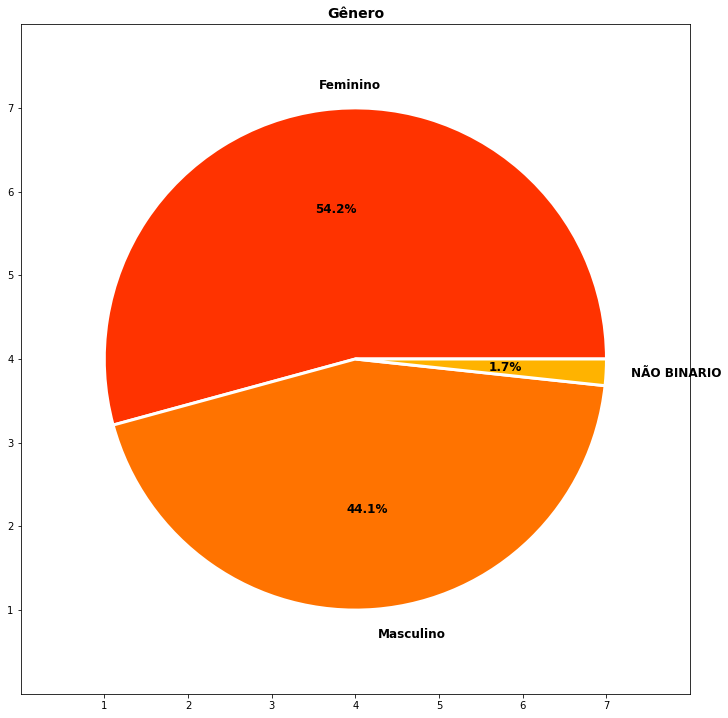

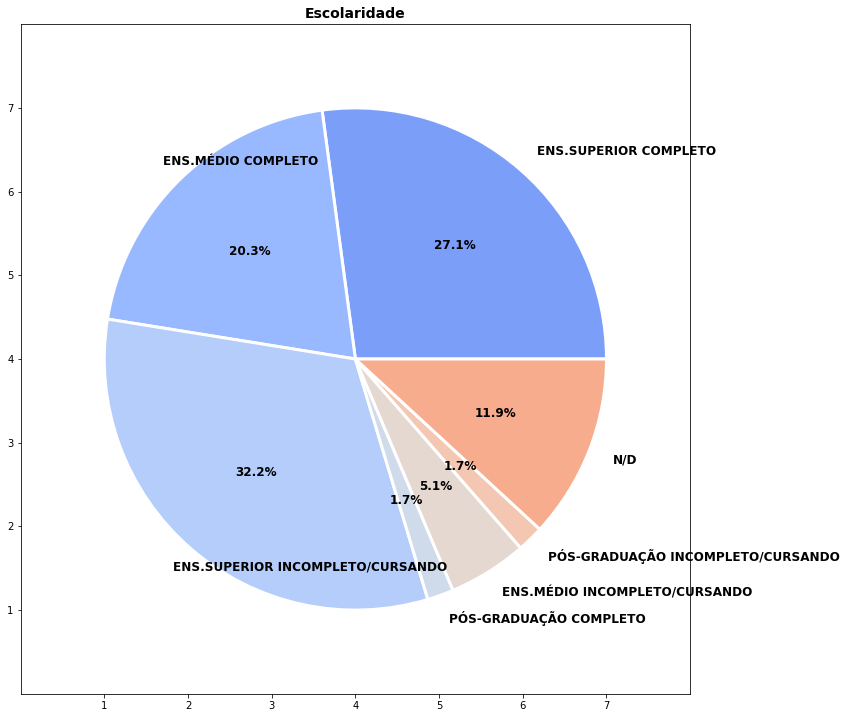

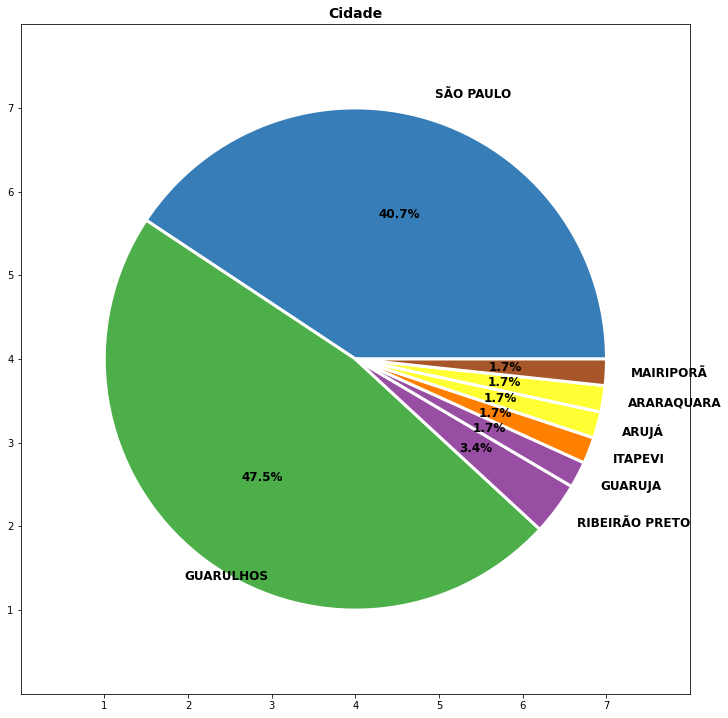

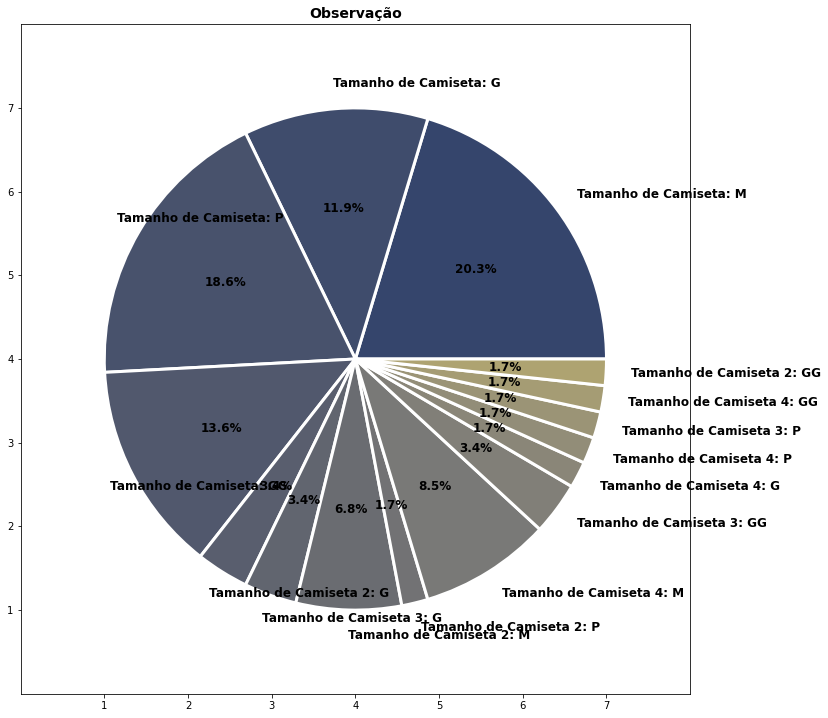

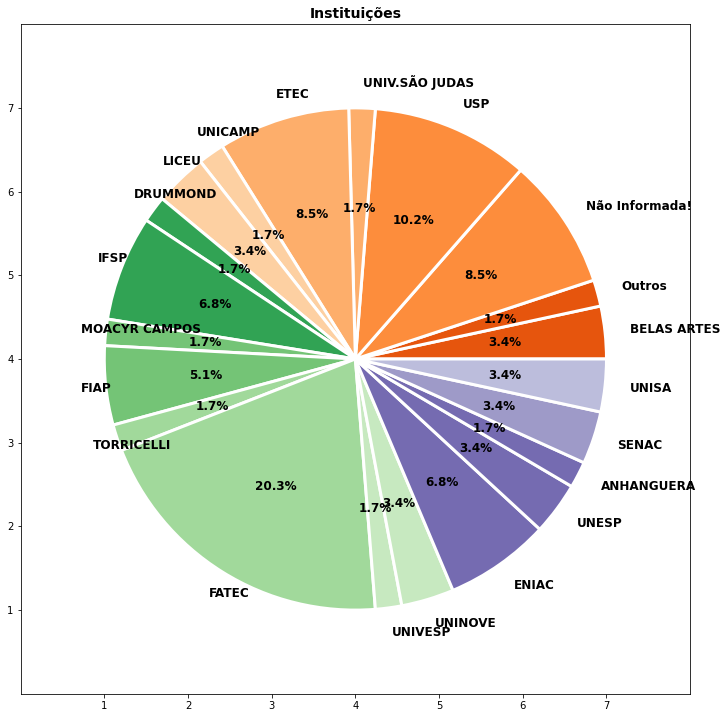

In [19]:
#
pieGraph(dataPieGraph(ins['genero'])
        ,titulo='Gênero'
        ,nomeArquivo='./Imagens/Genero.jpg'
        ,colorMap='autumn'
        )

pieGraph(dataPieGraph(ins['escolaridade2'])
        ,titulo='Escolaridade'
        ,nomeArquivo='./Imagens/Escolaridade.jpg'
        ,colorMap='coolwarm'
        )

pieGraph(dataPieGraph(ins['cidade'])
        ,titulo='Cidade'
        ,nomeArquivo='./Imagens/Cidade.jpg'
        ,colorMap='Set1'
        )

pieGraph(dataPieGraph(ins['observacao'])
        ,titulo='Observação'
        ,nomeArquivo='./Imagens/Observacao.jpg'
        ,colorMap='cividis'
        )

pieGraph(dataPieGraph(ins['instituicaoAjustada'])
        ,titulo='Instituições'
        ,nomeArquivo='./Imagens/Instituicao.jpg'
        ,colorMap='tab20c'
        )

### Gráfico de pizza com agrupamento de dado e seleção.

In [20]:
insInst=pd.DataFrame(ins.groupby('instituicaoAjustada')['nome'].count())
insInst.reset_index(inplace=True)
insInst=insInst[(insInst['nome']>=3)]
insInst

,instituicaoAjustada,nome
3,ENIAC,4
4,ETEC,5
5,FATEC,12
6,FIAP,3
7,IFSP,4
10,Não Informada!,5
20,USP,6


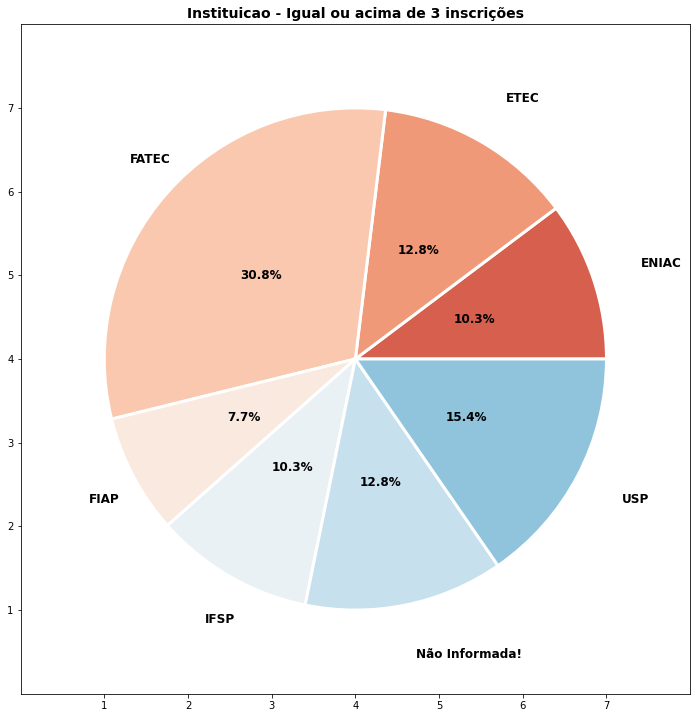

In [21]:
def pieGraphCompute(data, etiquetas, **kargs):
    
    colormap='viridis'
    
    for chave in kargs:
        if (chave=='titulo'):
            titulo=kargs[chave]
        if (chave=='colormap'):
            colormap=kargs[chave]
    
    colors = plt.get_cmap(colormap)(np.linspace(0.2, 0.7, len(etiquetas)))
    
    fig, ax = plt.subplots(figsize=(12,16))
    plt.title(titulo, fontdict={'size':14, 'weight':'bold'})
    
    ax.pie(x=data
            ,labels=etiquetas
            ,colors=colors
            ,autopct='%1.1f%%'
            ,pctdistance=.5
            ,labeldistance=1.2
            ,radius=3
            ,wedgeprops={"linewidth": 3, "edgecolor": "white"}
            ,textprops={'size':12, 'weight':'bold'}
            ,center=(4,4)
            ,frame=True
           )
    ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
           ylim=(0, 8), yticks=np.arange(1, 8))
    #plt.savefig(nomeArquivo, dpi=300)
    plt.show()

pieGraphCompute(data=insInst['nome'], 
                etiquetas=insInst['instituicaoAjustada'],
                titulo='Instituicao - Igual ou acima de 3 inscrições', 
                colormap='RdBu')

### Gráfico de pizza calculando faixa de valores.

Faixa de dados:
 [['De 15 à 19.', 'De 20 à 29.', 'De 30 à 39.', 'De 40 à 49.', '50+'], [22, 30, 6, 0, 1]]: 


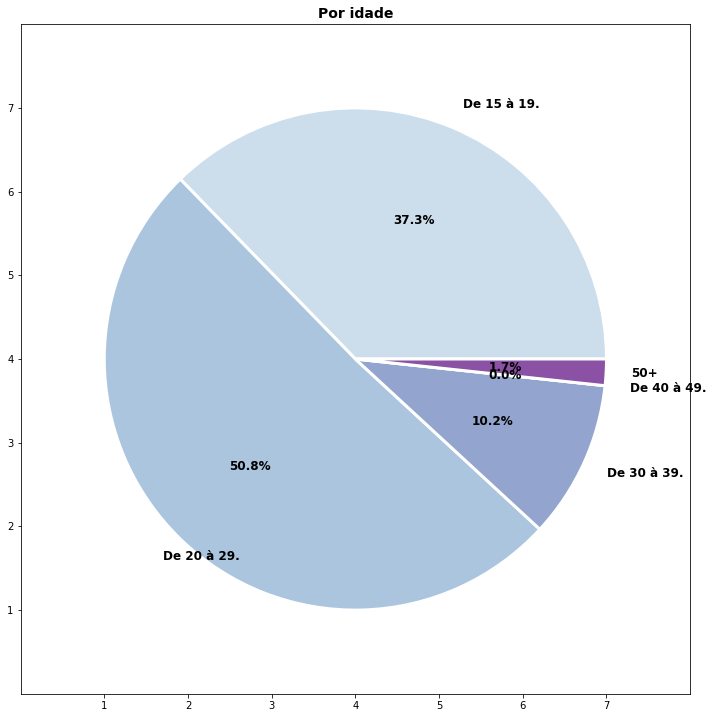

In [22]:
dataPie=dataComputeByRange([ #{'abaixo':0},{'min':1,'max':14},
                           {'min':15,'max':19},{'min':20,'max':29},{'min':30,'max':39},
                           {'min':40,'max':49},{'acima':50}],
                        ins['idade'] 
                   )
print('Faixa de dados:\n {dataPie}: '.format(dataPie=dataPie))

pieGraph(dataPie
        ,titulo='Por idade'
        ,nomeArquivo='./Imagens/PorIdade.jpg'
        ,colorMap='BuPu')

### Scatter Plot .

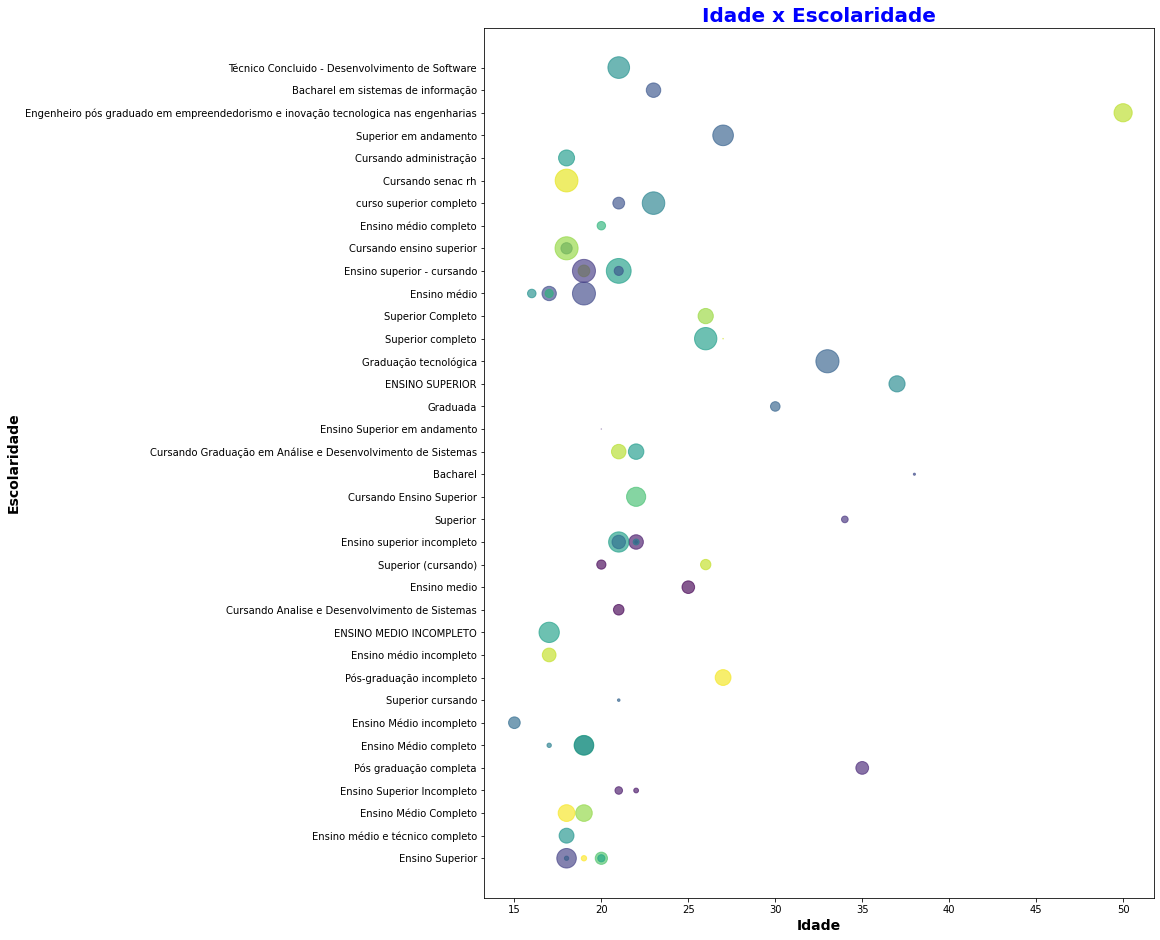

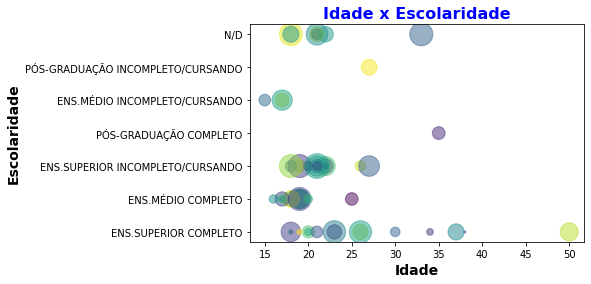

In [23]:
def scatterPlot():
    idade=ins['idade']
    escolar1=ins['escolaridade']
    escolar2=ins['escolaridade2']

    N=len(idade)
    colors = np.random.rand(N)
    area = (25 * np.random.rand(N))**2
    
    plt.figure(figsize=(12,16))
    plt.title('Idade x Escolaridade', c='blue', fontsize=20, fontweight='bold')
    plt.scatter(idade, escolar1, s=area, c=colors, alpha=.65)
    plt.xlabel('Idade', {'fontsize':14, 'fontweight':'bold'})
    plt.ylabel('Escolaridade', {'fontsize':14, 'fontweight':'bold'})
    plt.savefig('./imagens/Scatter01.jpg', dpi=300)
    plt.show()

    plt.title('Idade x Escolaridade', c='blue', fontsize=16, fontweight='bold')
    plt.scatter(idade, escolar2, s=area, c=colors, alpha=.5)
    plt.xlabel('Idade', {'fontsize':14, 'fontweight':'bold'})
    plt.ylabel('Escolaridade', {'fontsize':14, 'fontweight':'bold'})
    plt.savefig('./imagens/Scatter02.jpg', dpi=300)
    plt.show()

scatterPlot()

### Gráfico de linha (plot).

In [24]:
def graficoGenerico(dataFrame, **kargs):
    #np.random.seed(8192)
    ## Kargs
    titulo= "Título" if (kargs.get('titulo') is None) else kargs.get('titulo')
    xlabel= "Eixo X" if (kargs.get('xlabel') is None) else kargs.get('xlabel')
    ylabel= "Eixo Y" if (kargs.get('ylabel') is None) else kargs.get('ylabel')
    rotacao= 0 if (kargs.get('rotacao') is None) else kargs.get('rotacao')
    arquivo= './imagens/Grafico'+str(np.random.randint(1,100)).zfill(3)+'.jpg' if (kargs.get('arquivo') is None) else kargs.get('arquivo')
    
    plt.figure(figsize=(12,16))
    plt.title(titulo, {'fontsize':20,'fontweight':'bold', 'color':'Blue'})
    
    plt.xlabel(xlabel, {'fontsize':18,'fontweight':'bold', 'color':'Black'})
    plt.ylabel(ylabel, {'fontsize':18,'fontweight':'bold', 'color':'Black'})
    plt.xticks(rotation=rotacao)
    
    plt.plot(dataFrame, linewidth=2.5, color='Green', marker='s', 
                 mec='blue', markersize=12 )
    plt.savefig(arquivo, dpi=300)
    
    plt.show()

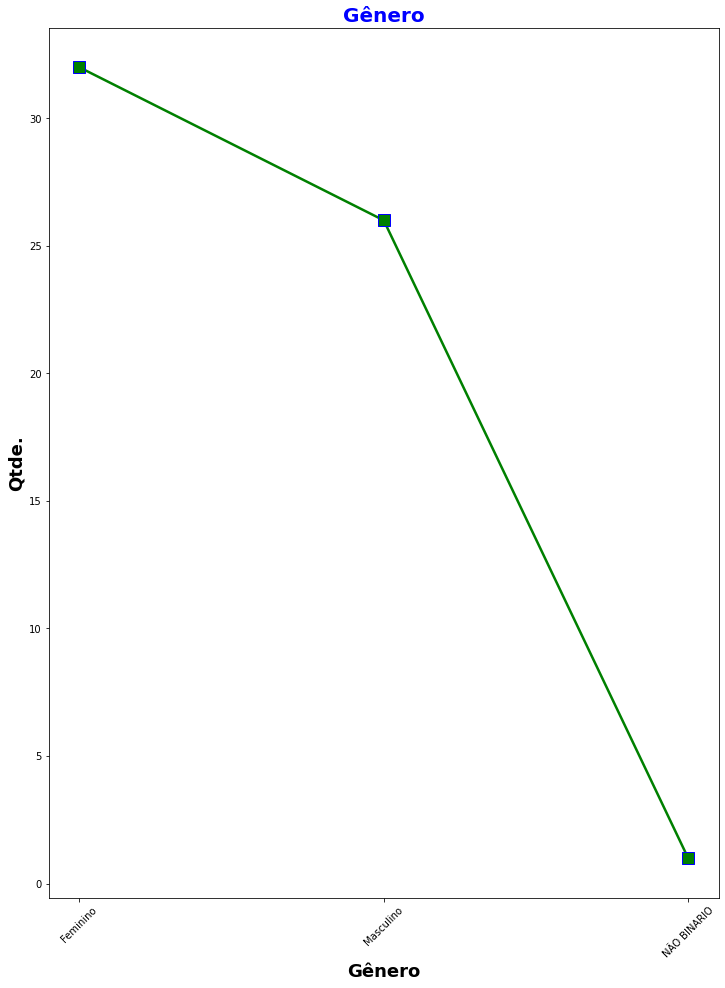

In [25]:
ins1=ins.groupby('genero')['genero'].count()
    
graficoGenerico(ins1, titulo='Gênero', xlabel='Gênero', ylabel='Qtde.', 
                rotacao=45, arquivo='./imagens/Grafico_001.jpg')

### Gerar um atquivo html com os principais dados.

In [26]:
# https://stackoverflow.com/questions/50807744/apply-css-class-to-pandas-dataframe-using-to-html
def geraHTML(dataFrame, arquivoHTML = 'index.html', 
             cssStyle = 'style.css', titulo = 'Html'):
    html_string = '''
        <!DOCTYPE html>
        <html lang='pt-br'>
          <head>
              <title>{titulo}</title>
          </head>
          <link rel="stylesheet" type="text/css" href="{css}"/>
          <body>
                {tabela}
          </body>
        </html>
    '''
    with open(arquivoHTML, 'w') as arquivo:
        arquivo.write(html_string.format(titulo=titulo,
                               tabela=dataFrame.to_html(
                                       index=False,
                                       justify='center',
                                       classes='mystyle'),
                               css=cssStyle
                              ))
    
insHtml=ins[['nroInscricao','nome','cpf','cpfValidado',
             'dataNascimento','dataNascAjustada','idade','genero','generoId',
             'escolaridade','escolaridade2','instituicao','instituicaoAjustada',
             'telefoneAjustado','email','emailValidado',
             'cidade','cepAjustado','observacao','selecionado']]       
insHtml.columns=[['Nro.Inscricao','Nome','CPF','CPF Validado',
                  'Data Nascimento','Data Nasc.','Idade','Gênero','Id.Gênero',
                  'Escolaridade','Escolar.Ajustado','Instituição','Inst.Ajustada',
                  'Telefone/Cel','e-Mail','e-Mail Validado',
                  'Cidade','CEP','Observação','Selecionado']]  
        
geraHTML(insHtml, 
         './html/Hackathon 2024 - Inscrições.html','../css/df_style.css',
         'Hackathon 2024 - Inscrições')

In [27]:
#### End

In [28]:
## Função de agrupar...
def agregar(dataFrame) -> list:
    item=[]; valor=[]
    
    for it in dataFrame:
        localizado=False
        
        for posicao, i in enumerate(item):
            if (it==i):
                valor[posicao]+=1; localizado=True
                break 
        
        if (not localizado):
            item.append(it); valor.append(1)
  
    return (item, valor)

gen = pd.DataFrame(agregar(ins['genero']))

#gen.columns=['Feminino','Masculino','NÃO BINARIO','Prefiro não informar']
gen.columns=['Feminino','Masculino','NÃO BINARIO']
gen.drop(axis=0, index=0, inplace=True)
gen

,Feminino,Masculino,NÃO BINARIO
1,32,26,1


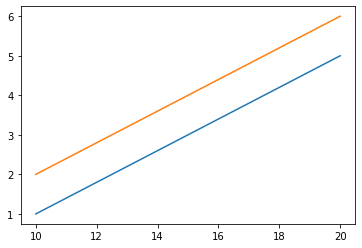

In [29]:
x = [10, 15, 20]
y = np.array([[1, 2], [3, 4], [5, 6]])
plt.plot(x, y)

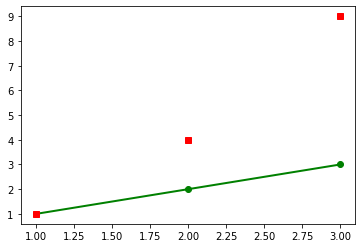

In [30]:
plt.plot([1, 2, 3], [1, 2, 3], 'go-', label='line 1', linewidth=2)
plt.plot([1, 2, 3], [1, 4, 9], 'rs', label='line 2')

In [31]:
genero=ins['genero'].unique()
genero

array(['Feminino', 'Masculino', 'NÃO BINARIO'], dtype=object)

In [32]:
dataF=ins[(ins['genero']=='Feminino')][['idade']]
#dataM=ins[(ins['genero']=='Masculino')][['idade']]
#dataNB=ins[(ins['genero']=='NÃO BINARIO')][['idade']]
#dataNI=ins[(ins['genero']=='Prefiro não informar')][['idade']]
#dataT=[[dataF],[dataM],[dataNB],[dataNI]]


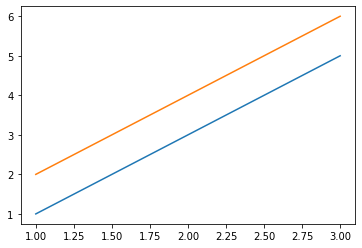

In [33]:
x = np.array([1,2,3])
y = np.array([[1, 2], [3, 4], [5, 6]])
plt.plot(x, y)